In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- *Name :* *Smruti Sonekar*
- *Branch :* *TY CSE DS*
- *UID :* *2021700064*
- *EXP NO :* *6*
- *Topic :* *Implement Decision Tree Algorithm*

In [23]:
df1=pd.DataFrame(pd.read_csv("./files/diabetes2.csv"))
df1.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
747,1,81,74,41,57,46.3,1.096,32,0
717,10,94,72,18,0,23.1,0.595,56,0
138,0,129,80,0,0,31.2,0.703,29,0
528,0,117,66,31,188,30.8,0.493,22,0
212,7,179,95,31,0,34.2,0.164,60,0


*Problem Statement:*
- **Diabetes is a chronic disease that occurs when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. It is a significant health issue globally, affecting millions of people. Early detection and management of diabetes are crucial for preventing complications and improving health outcomes.**

- **You are provided with a dataset containing various health metrics and indicators for a group of individuals, including information about whether each person has diabetes or not. Your task is to build a predictive model that can accurately classify individuals as either diabetic or non-diabetic based on their health attributes.**

In [24]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [25]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df1.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Since *Pregnancies , SkinThickness, DiabetesPedigreeFunction* mean is very less which can lead to imbalanced dataset ,so will not consider these columns in decision tree

In [27]:
X1=df1[['Age','BloodPressure','Insulin','Glucose','BMI']]
y1=df1['Outcome']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [29]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [30]:
X_train1.shape,X_test1.shape

((537, 5), (231, 5))

- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving - Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision - rules and each leaf node represents the outcome.
- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple - branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
- The decisions or the test are performed on the basis of features of the given dataset.
- It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
- It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

In [31]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [32]:
# Train the classifier on the training data
clf.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [33]:
# Make predictions on the testing data
y_pred = clf.predict(X_test1)

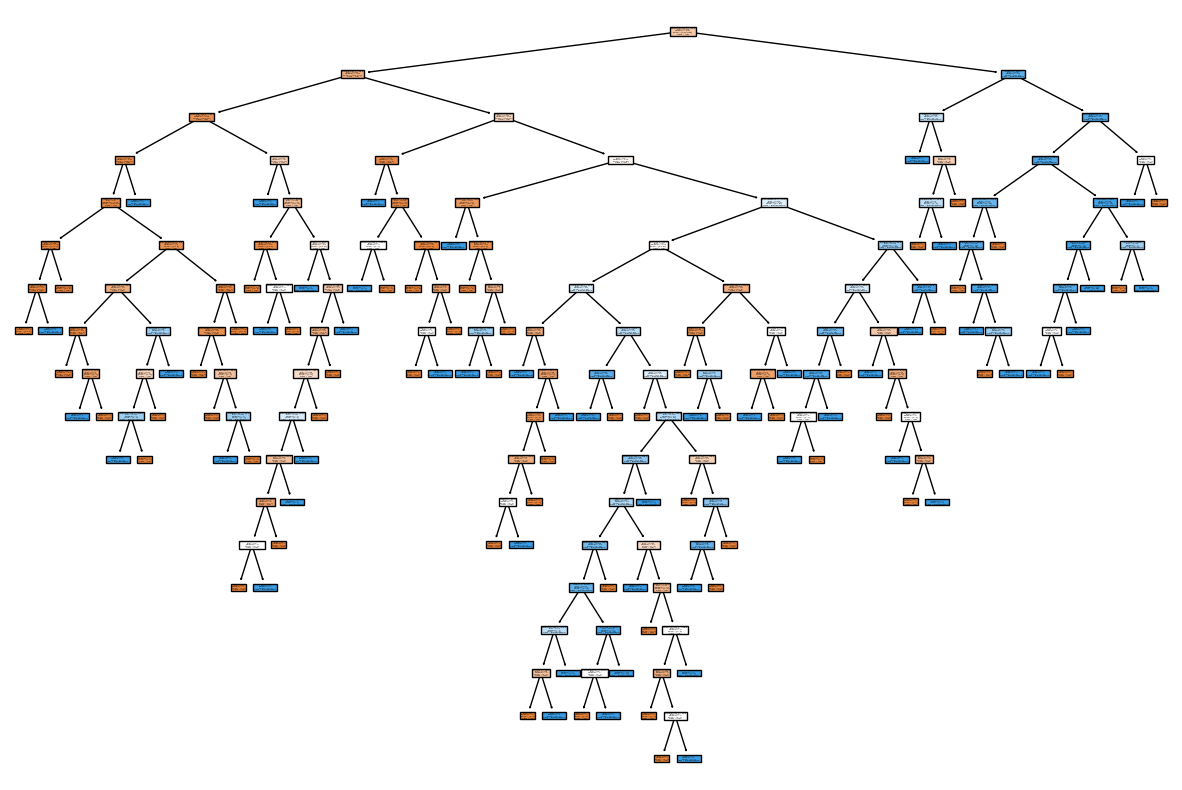

In [34]:
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=df1.columns[:-1], class_names=['Age','BloodPressure','Insulin','Glucose','BMI'])
plt.show()

Decision Tree Terminologies
- Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
- Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
- Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
- Branch/Sub Tree: A tree formed by splitting the tree.
- Pruning: Pruning is the process of removing the unwanted branches from the tree.
- Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.

Algorithm of Decision tree
- 
- Step 1: Begin the tree with the root node, denoted as S, containing the complete dataset.
- Step 2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
- Step 3: Divide the dataset S into subsets that contain possible values for the best attribute.
- Step 4: Generate a decision tree node, which represents the best attribute.
- Step 5: Recursively create new decision trees using the subsets of the dataset created in Step 3. Continue this process until a stage is reached where further classification is not possible, and designate the final node as a leaf node.


In [35]:
results = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred})
results.head()

,Actual,Predicted
668,0,1
324,0,1
624,0,0
690,0,0
473,0,0


In [36]:
correctly_classified = [1 if actual == predicted else 0 for actual, predicted in zip(results['Actual'], results['Predicted'])]

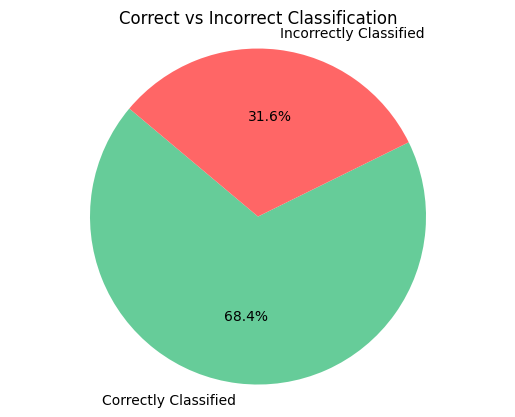

In [37]:
# Count number of correctly classified instances
num_correct = sum(correctly_classified)

# Count number of incorrectly classified instances (if needed)
num_incorrect = len(correctly_classified) - num_correct

# Create pie chart
labels = ['Correctly Classified', 'Incorrectly Classified']
sizes = [num_correct, num_incorrect]
colors = ['#66CC99', '#FF6666']  # Green for correctly classified, Red for incorrectly classified

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Correct vs Incorrect Classification')
plt.show()

In decision tree algorithms, information gain and entropy are used as measures to determine the best attribute for splitting the dataset at each node of the tree. Here's a detailed explanation of both concepts:

Entropy:
Entropy is a measure of impurity or randomness in the dataset. In the context of decision trees, entropy is used to quantify the homogeneity of a set of samples. A dataset with low entropy means it is more homogeneous (contains mostly one class), while a dataset with high entropy is more heterogeneous (contains samples from multiple classes).

Information Gain:
Information gain is a measure of the effectiveness of a particular attribute in classifying the dataset. It quantifies how much the entropy of the dataset decreases after splitting it on a particular attribute. The attribute with the highest information gain is chosen as the splitting criterion at each node of the decision tree.

Information Gain(S,A)=Entropy(S)−∑ 
v∈Values(A)

Decision Tree Splitting:
In decision tree algorithms, the attribute with the highest information gain is chosen as the splitting attribute at each node. This process is repeated recursively until a stopping criterion is met, such as reaching a maximum depth or having a minimum number of samples in each leaf node.

In summary, entropy measures the impurity of a dataset, while information gain measures the effectiveness of an attribute in reducing this impurity when used for splitting the dataset in a decision tree. By choosing attributes that maximize information gain, decision trees can effectively split the dataset to classify samples into their respective classes.








In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [39]:
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred, average='weighted')
recall = recall_score(y_test1, y_pred, average='weighted')
f1 = f1_score(y_test1, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test1, y_pred)

# Print the DECISION TREE evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.683982683982684
Precision: 0.7027461434293254
Recall: 0.683982683982684
F1 Score: 0.6897335789396448
Confusion Matrix:
 [[106  45]
 [ 28  52]]


In [40]:
# Make predictions on training and testing data
y_train_pred = clf.predict(X_train1)
y_test_pred = clf.predict(X_test1)




In [41]:
# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train1, y_train_pred)
test_accuracy = accuracy_score(y_test1, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.683982683982684


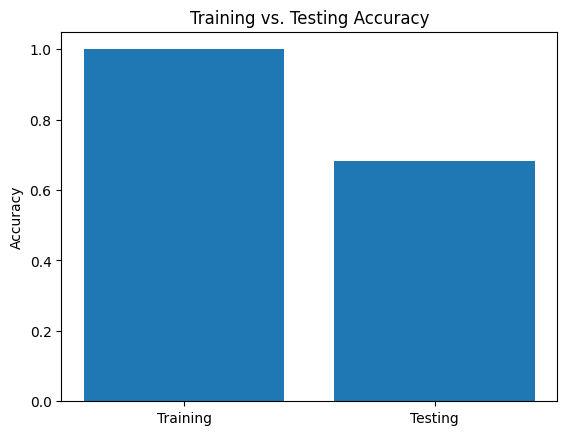

In [42]:
# Plotting
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy])
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.show()

Conclusion:*Based on the evaluation, the decision tree model achieved an accuracy of 68% for the given problem statement. While the model performed well on the training set, it exhibited poor performance on the test set. This suggests that the model may have overfit the training data and failed to generalize to unseen data*